In [4]:
import mne
import os

In [37]:
# Define the path to your .edf file
edf_file_path = './raw-data/PN00-1.edf'  # Replace with the actual file name if it's in the same directory

# Load the EDF file
raw = mne.io.read_raw_edf(edf_file_path, preload=True)

# Crop the raw data to take only 30 seconds for faster processing
#raw.crop(tmin=20, tmax=50)   #Take 30 seconds for speed
raw.crop(tmin=1143, tmax=1213) #epilepsy episode
#raw.crop(tmin=1083, tmax=1273) #epilepsy episode + 2 min buffer before and after

#raw.crop(tmin=1023, tmax=1333) #epilepsy episode + 2 min buffer before and after
#raw.crop(tmin=1023, tmax=1213) #epilepsy episode + 2 min buffer before 


# Pick only EEG channels, excluding any marked as bad
raw.pick(picks="eeg", exclude="bads")

# Define a mapping from your channel names to standard 10-20 system names
# This is to ensure consistency and compatibility with standard EEG analysis tools
rename_mapping = {
    'EEG Fp1': 'Fp1',
    'EEG Fp2': 'Fp2',
    'EEG F3': 'F3',
    'EEG F4': 'F4',
    'EEG F7': 'F7',
    'EEG F8': 'F8',
    'EEG T3': 'T3',
    'EEG T4': 'T4',
    'EEG C3': 'C3',
    'EEG C4': 'C4',
    'EEG T5': 'T5',
    'EEG T6': 'T6',
    'EEG P3': 'P3',
    'EEG P4': 'P4',
    'EEG O1': 'O1',
    'EEG O2': 'O2',
    'EEG Fz': 'Fz',
    'EEG Cz': 'Cz',
    'EEG Pz': 'Pz',
    'EEG Fc1': 'FC1',
    'EEG Fc2': 'FC2',
    'EEG Fc5': 'FC5',
    'EEG Fc6': 'FC6',
    'EEG Cp1': 'CP1',
    'EEG Cp2': 'CP2',
    'EEG Cp5': 'CP5',
    'EEG Cp6': 'CP6',
    'EEG F9': 'F9',
    'EEG F10': 'F10',
    'EKG EKG': 'ECG'
}

# Rename the channels in the raw object according to the mapping
raw.rename_channels(rename_mapping)

# Drop non-brain channels which are not used in EEG brain signal analysis
# - 'ECG' is for cardiac activity monitoring
# - 'SPO2' is for oxygen saturation level monitoring
# - 'HR' is for heart rate monitoring
# - '1', '2', 'MK' are auxiliary channels not related to EEG brain signals
raw.drop_channels(['ECG', 'SPO2', 'HR', '1', '2', 'MK'])


# Define a standard montage (10-20 system)
# This ensures that electrode locations are accurately represented, which is important for spatial analyses
montage = mne.channels.make_standard_montage('standard_1020')

# Apply the montage to the raw data
raw.set_montage(montage)

# Apply notch filter to remove power line noise at 50 Hz
raw.notch_filter(freqs=50.0, notch_widths=1.0)

# Apply notch filter to remove power line noise at 50 Hz
raw.notch_filter(freqs=150.0, notch_widths=1.0)

# ICA works best with a highpass filter applied
raw.filter(l_freq=1.0, h_freq=None)

# Load the raw data into memory
raw.load_data()


Extracting EDF parameters from /Users/diegotaquiri/Desktop/proyectos/upch/cursos-2024-1/ISB/03-22-24-vie-github/git_clones/ISB-equipo11/Documentación/Laboratorio 13/raw-data/PN00-1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1343999  =      0.000 ...  2624.998 secs...


/var/folders/zp/l_dxbf9s3gs1nn6pxs7lmdww0000gp/T/ipykernel_9766/225467241.py:5: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_file_path, preload=True)
/var/folders/zp/l_dxbf9s3gs1nn6pxs7lmdww0000gp/T/ipykernel_9766/225467241.py:5: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_file_path, preload=True)
/var/folders/zp/l_dxbf9s3gs1nn6pxs7lmdww0000gp/T/ipykernel_9766/225467241.py:5: RuntimeWarning: Highpass cutoff frequency 15.91549 is greater than lowpass cutoff frequency 15.0, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_file_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.00
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 48.75 Hz)
- Upper passband edge: 51.00 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 51.25 Hz)
- Filter length: 3381 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 1.5e+02 - 1.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 149.00
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 148.75 Hz)
- Uppe

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Measurement date,"January 01, 2016 19:39:33 GMT"
Experimenter,Unknown
Participant,
Digitized points,32 points
Good channels,29 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,512.00 Hz
Highpass,1.00 Hz
Lowpass,256.00 Hz


In [85]:
# Plot the raw EEG signals
raw.plot(duration=310, n_channels=30, scalings='auto', title='Raw EEG Signals', show=True)

Using pyopengl with version 3.1.6


Channels marked as bad:
none


Run ICA



In [38]:
ica = mne.preprocessing.ICA(
    n_components=10, method="picard", max_iter="auto", random_state=97
)
ica.fit(raw)

Fitting ICA to data using 29 channels (please be patient, this may take a while)
Selecting by number: 10 components
Fitting ICA took 1.1s.


Method,picard
Fit parameters,max_iter=500
Fit,67 iterations on raw data (35841 samples)
ICA components,10
Available PCA components,29
Channel types,eeg
ICA components marked for exclusion,—


Remove components with postural muscle artifact using ICA



In [86]:
ica.plot_sources(raw)

Creating RawArray with float64 data, n_channels=10, n_times=35841
    Range : 585216 ... 621056 =   1143.000 ...  1213.000 secs
Ready.


Using pyopengl with version 3.1.6


    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
35 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
35 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
35 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
35 matching events found
No baseline correction applied
0 projection items activated


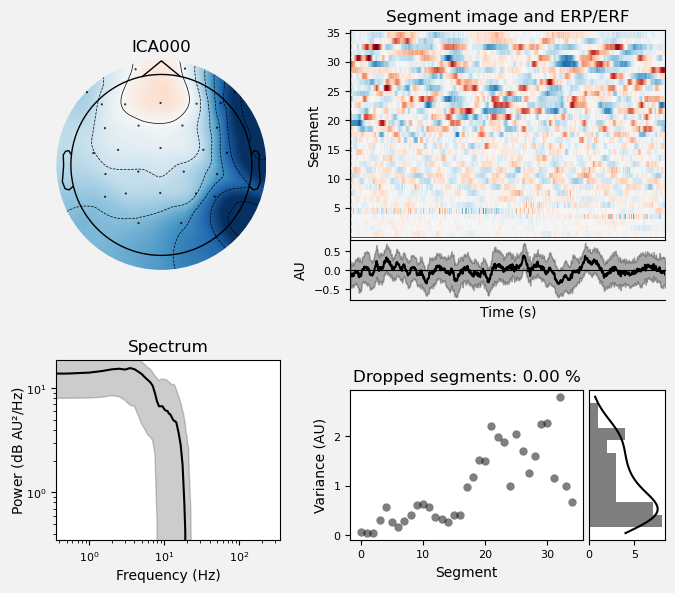

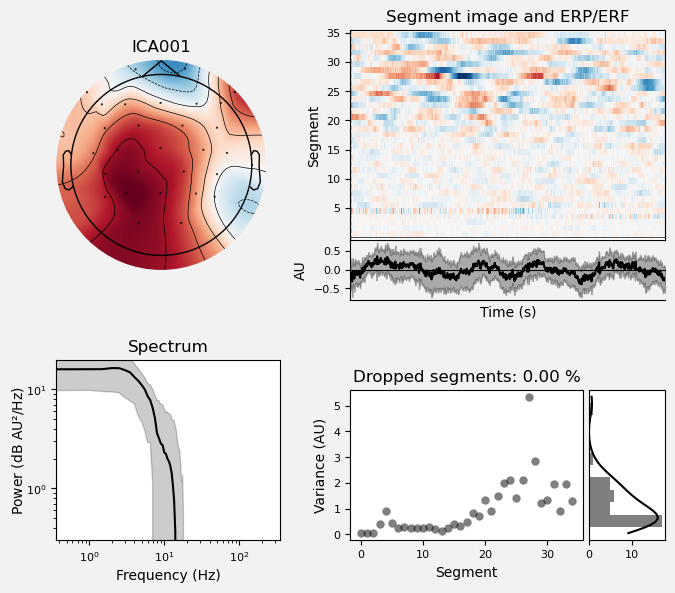

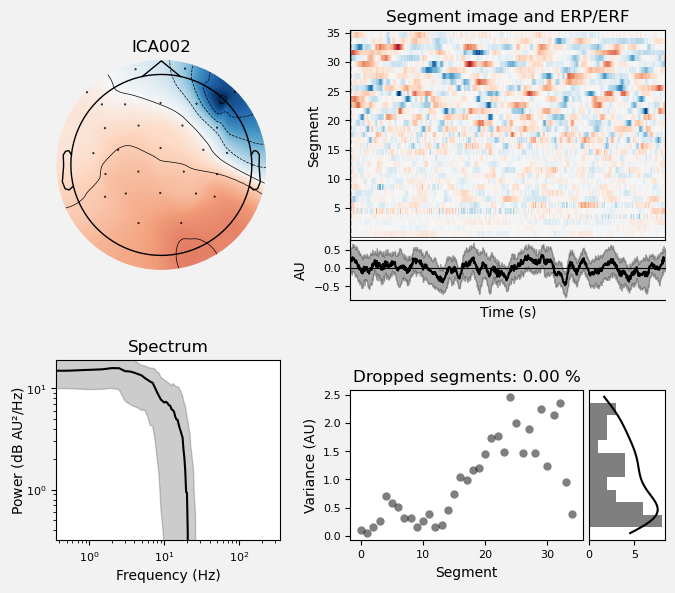

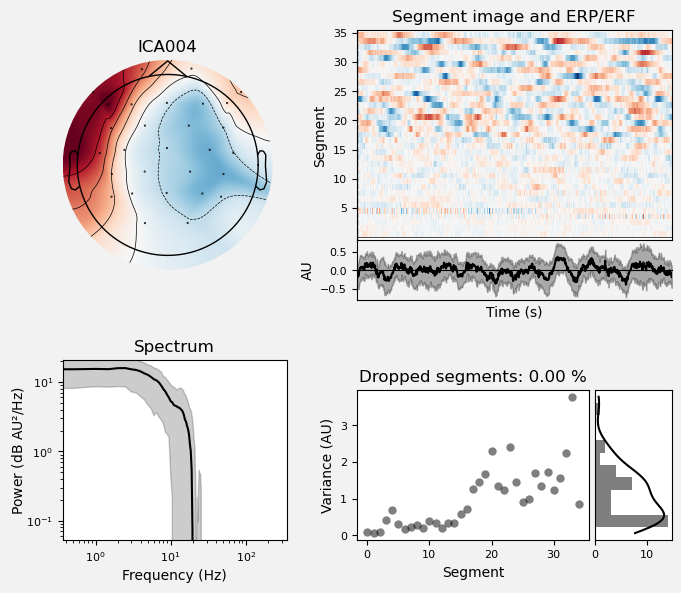

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [39]:
idx = [0, 1, 2, 4]
ica.plot_properties(raw, picks=idx, log_scale=True)

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
35 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
35 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
35 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
35 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
35 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
35 matching events found
No baseline correction applied
0 projection items activated


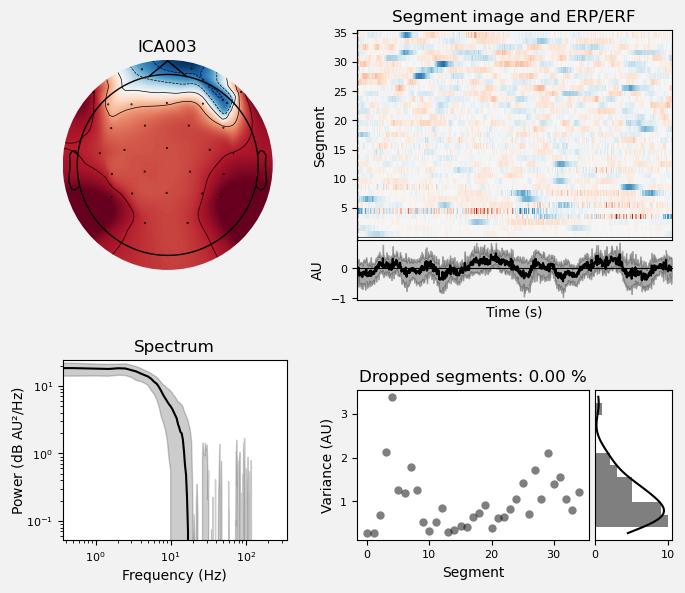

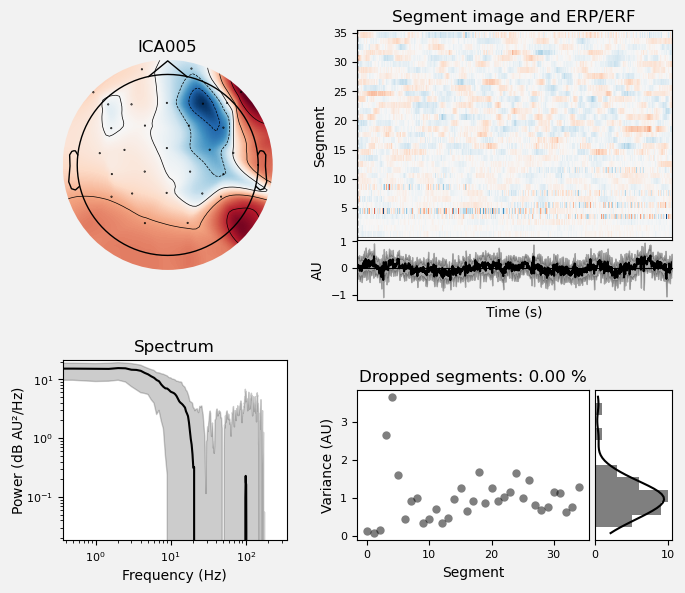

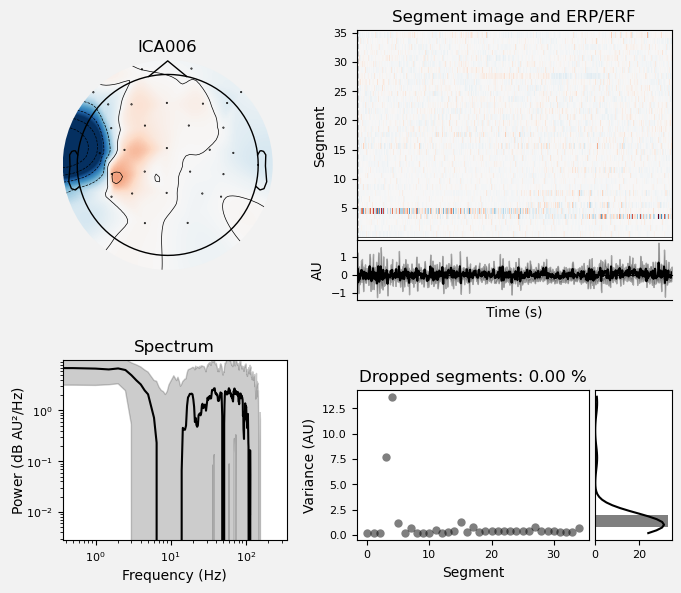

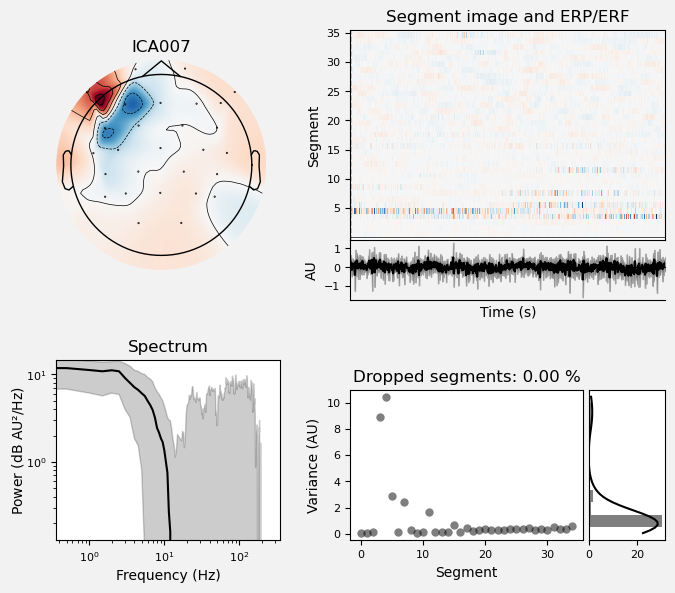

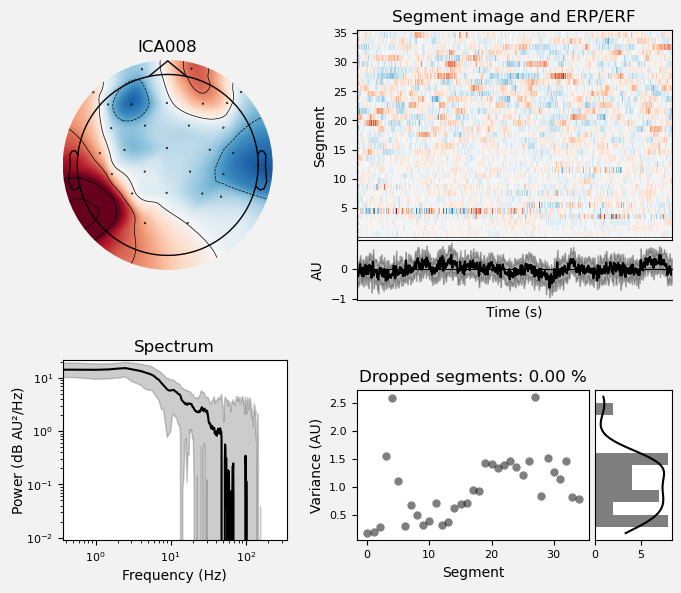

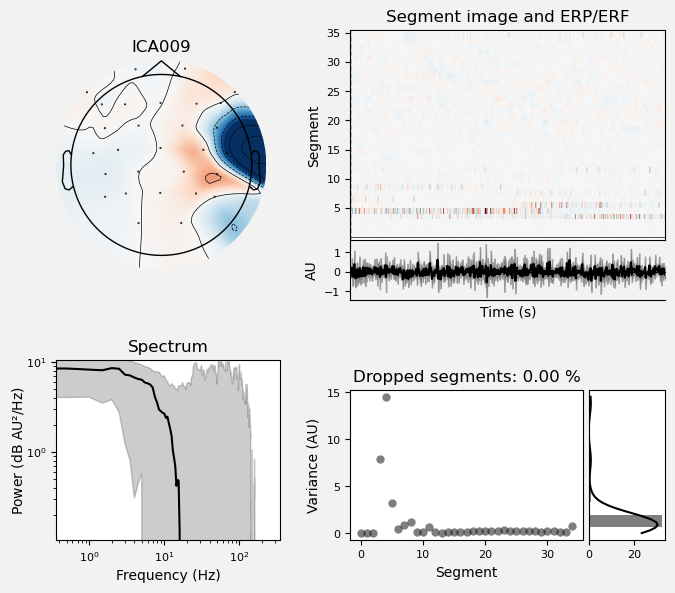

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [32]:
artifacts_idx = [3,5,6,7,8,9]
ica.plot_properties(raw, picks=artifacts_idx, log_scale=True)

Applying ICA to Raw instance
    Transforming to ICA space (10 components)
    Zeroing out 0 ICA components
    Projecting back using 29 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (10 components)
    Zeroing out 6 ICA components
    Projecting back using 29 PCA components


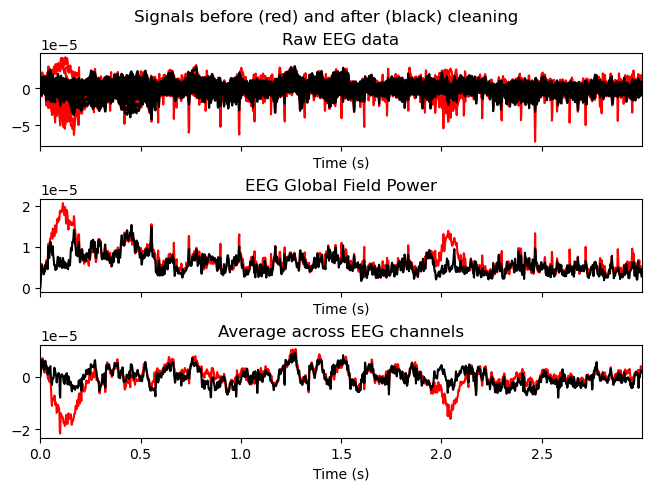

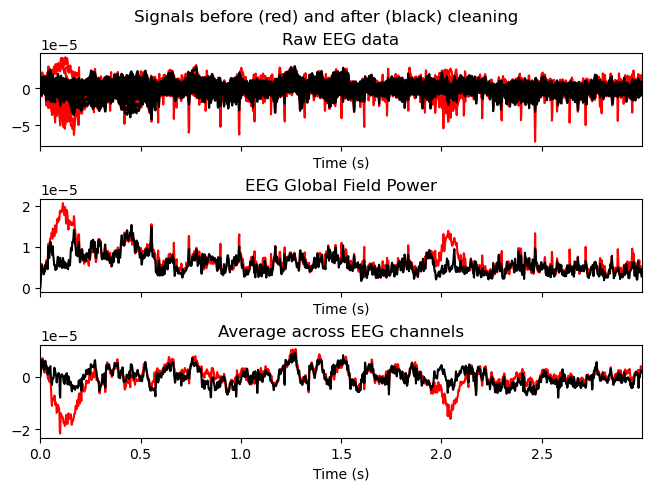

In [33]:
ica.apply(raw) 
ica.plot_overlay(raw, exclude=artifacts_idx)

Finally, let's try an automated algorithm to find muscle components
and ensure that it gets the same components we did manually.



Effective window size : 4.000 (s)


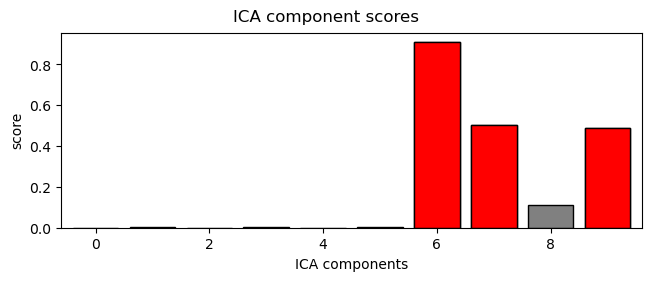

Manually found muscle artifact ICA components:      [3, 5, 6, 7, 8, 9]
Automatically found muscle artifact ICA components: [6, 7, 9]


In [34]:
muscle_idx_auto, scores = ica.find_bads_muscle(raw)
ica.plot_scores(scores, exclude=muscle_idx_auto)
print(
    f"Manually found muscle artifact ICA components:      {artifacts_idx}\n"
    f"Automatically found muscle artifact ICA components: {muscle_idx_auto}"
)

In [16]:
# Plot the raw EEG signals
raw.plot(duration=310, n_channels=30, scalings='auto', title='ICA Filtered EEG', show=True)

Using pyopengl with version 3.1.6


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
import pywt
from scipy.signal import spectrogram, periodogram, welch, iirnotch, filtfilt



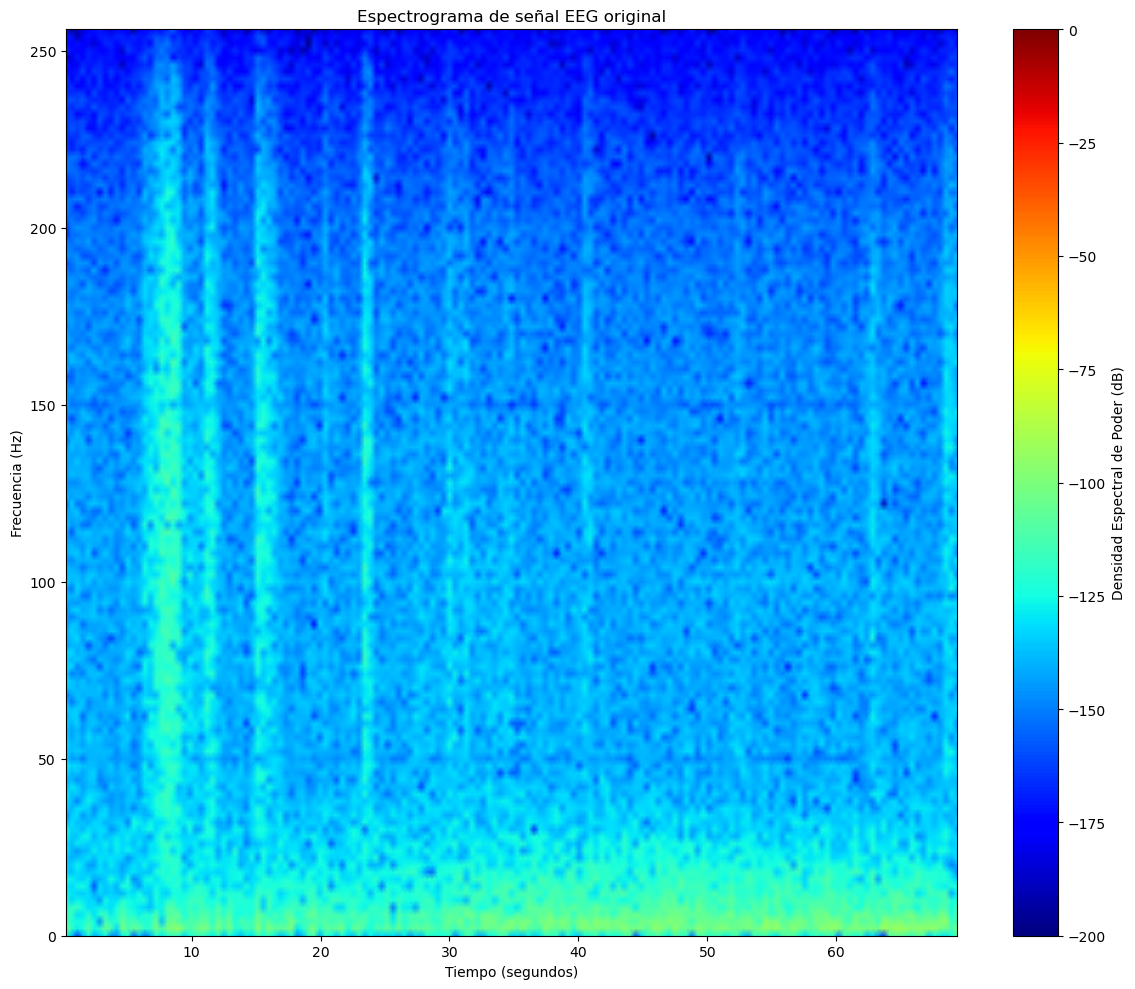

In [43]:
# Obtener los datos de la señal EEG
eeg_data = raw.get_data()

# Obtener la frecuencia de muestreo
fs = raw.info['sfreq']

# Seleccionar un canal para el espectrograma, por ejemplo, el primer canal
channel_data = eeg_data[0]

# Generar el espectrograma
frequencies, times, spectrogram_orig = spectrogram(channel_data, fs=fs)

# Plotear el espectrograma
plt.figure(figsize=(12, 10))
plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram_orig), shading='gouraud', cmap='jet', vmin=-200, vmax=0)
#plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram_orig), shading='gouraud', cmap='jet', vmin=-100, vmax=0)
plt.title('Espectrograma de señal EEG original')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Frecuencia (Hz)')
plt.colorbar(label='Densidad Espectral de Poder (dB)')
plt.tight_layout()
plt.show()


## References

Dhani Dharmaprani, Hoang K. Nguyen, Trent W. Lewis, Dylan DeLosAngeles, John O. Willoughby, and Kenneth J. Pope. A comparison of independent component analysis algorithms and measures to discriminate between EEG and artifact components. In 2016 38th Annual International Conference of the IEEE Engineering in Medicine and Biology Society (EMBC), 825–828. Orlando, FL, USA, 2016. IEEE. doi:10.1109/EMBC.2016.7590828.

